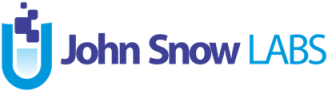

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/misc/Templatic_Augmentation_Control_Notebook.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering and Summarization tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation, toxicity and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest on John Snow Labs

In [2]:
!pip install langtest[johnsnowlabs]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.2/473.2 kB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 639.9/639.9 kB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.0 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880756 sha256=b035dce7a1d5c0148aa268d59716027cbc6fbf54792e804852c5eefc375efdb2
  Stored in directory: /root/.cac

# Harness and its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [1]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - |
|**task**     |Task for which the model is to be evaluated (text-classification or ner)|
|**model**     |PipelineModel or path to a saved model or pretrained pipeline/model from hub.
|**data**       |Path to the data that is to be used for evaluation. Can be .csv or .conll file in the CoNLL format
|**config**     |Configuration for the tests to be performed, specified in form of a YAML file.
|**hub**       |model hub to load from the path. Required if model param is passed as path.|

<br/>
<br/>

# Real-World Project Workflows

In this section, we dive into complete workflows for using the model testing module in real-world project settings.

## Robustness Testing

In this example, we will be testing a model's robustness. We will be applying 2 tests: add_typo and lowercase. The real-world project workflow of the model robustness testing and fixing in this case goes as follows:

1. Train NER model on original CoNLL training set

2. Test NER model robustness on CoNLL test set

3. Augment CoNLL training set based on test results

4. Train new NER model on augmented CoNLL training set

5. Test new NER model robustness on the CoNLL test set from step 2

6. Compare robustness of new NER model against original NER model

#### Load Train and Test CoNLL

In [2]:
# Load test CoNLL
!wget https://raw.githubusercontent.com/JohnSnowLabs/langtest/main/langtest/data/conll/sample.conll

# Load train CoNLL
!wget https://raw.githubusercontent.com/JohnSnowLabs/langtest/main/demo/data/conll03.conll

--2023-07-20 09:19:50--  https://raw.githubusercontent.com/JohnSnowLabs/langtest/main/langtest/data/conll/sample.conll
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50519 (49K) [text/plain]
Saving to: ‘sample.conll’

sample.conll        100%[===================>]  49.33K  --.-KB/s    in 0.003s  

2023-07-20 09:19:50 (14.3 MB/s) - ‘sample.conll’ saved [50519/50519]

--2023-07-20 09:19:51--  https://raw.githubusercontent.com/JohnSnowLabs/langtest/main/demo/data/conll03.conll
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 827443 (

#### Step 1: Train NER Model

In [3]:
from johnsnowlabs import nlp

In [4]:
ner_model = nlp.load('bert train.ner').fit(dataset_path="/content/conll03.conll")


small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]


#### Step 2: Test NER Model Robustness  

In [5]:
harness = Harness(task="ner", model=ner_model, data="sample.conll", hub="johnsnowlabs")

Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "american_to_british": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "min_micro_f1_score": {
    "min_score": 0.7
   }
  },
  "bias": {
   "replace_to_female_pronouns": {
    "min_pass_rate": 0.7
   },
   "replace_to_low_income_country": {
    "min_pass_rate": 0.7
   }
  },
  "fairness": {
   "min_gender_f1_score": {
    "min_score": 0.6
   }
  },
  "representation": {
   "min_label_representation_count": {
    "min_count": 50
   }
  }
 }
}


In [6]:
harness.configure({
    'tests': {
        'defaults': {'min_pass_rate': 0.65},

        'robustness': {
            'add_typo': {'min_pass_rate': 0.73},
            'lowercase':{'min_pass_rate': 0.65},
        }
    }
})

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'add_typo': {'min_pass_rate': 0.73},
   'lowercase': {'min_pass_rate': 0.65}}}}

Here we have configured the harness to perform two robustness tests (add_typo and lowercase) and defined the minimum pass rate for each test.


#### Generating the test cases.




In [7]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 1407.48it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

In [8]:
harness.testcases()

,category,test_type,original,test_case
0,robustness,add_typo,"SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRI...","SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRI..."
1,robustness,add_typo,Nadim Ladki,Narim Ladki
2,robustness,add_typo,"AL-AIN , United Arab Emirates 1996-12-06","AL-AIN , Uniyed Arab Emirates 1996-12-06"
3,robustness,add_typo,Japan began the defence of their Asian Cup tit...,Japan began the defence of their Asian Cup tit...
4,robustness,add_typo,But China saw their luck desert them in the se...,But China saw their luck fesert them in the se...
...,...,...,...,...
447,robustness,lowercase,Portuguesa 1 Atletico Mineiro 0,portuguesa 1 atletico mineiro 0
448,robustness,lowercase,CRICKET - LARA ENDURES ANOTHER MISERABLE DAY .,cricket - lara endures another miserable day .
449,robustness,lowercase,Robert Galvin,robert galvin
450,robustness,lowercase,MELBOURNE 1996-12-06,melbourne 1996-12-06


harness.testcases() method gives the produced test cases in form of a pandas data frame.

#### Saving test configurations, data, test cases

In [9]:
harness.save("saved_test_configurations")

#### Running the tests

In [10]:
harness.run()

Running testcases... : 100%|██████████| 452/452 [00:49<00:00,  9.21it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

In [11]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,pass
0,robustness,add_typo,"SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRI...","SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRI...","japan: LOC, china: LOC","japan: LOC, china: LOC, surprisr: LOC",True
1,robustness,add_typo,Nadim Ladki,Narim Ladki,nadim ladki: PER,narim ladki: PER,True
2,robustness,add_typo,"AL-AIN , United Arab Emirates 1996-12-06","AL-AIN , Uniyed Arab Emirates 1996-12-06","al-ain: LOC, united arab emirates: LOC","al-ain: LOC, uniyed: PER, arab emirates: LOC",False
3,robustness,add_typo,Japan began the defence of their Asian Cup tit...,Japan began the defence of their Asian Cup tit...,"japan: LOC, asian cup: MISC, syria: LOC","japan: LOC, asian cup: MISC, syria: LOC",True
4,robustness,add_typo,But China saw their luck desert them in the se...,But China saw their luck fesert them in the se...,"china: LOC, uzbekistan: LOC","china: LOC, uzbekistan: LOC",True
...,...,...,...,...,...,...,...
447,robustness,lowercase,Portuguesa 1 Atletico Mineiro 0,portuguesa 1 atletico mineiro 0,"portuguesa: ORG, atletico mineiro: ORG","portuguesa: ORG, atletico mineiro: ORG",True
448,robustness,lowercase,CRICKET - LARA ENDURES ANOTHER MISERABLE DAY .,cricket - lara endures another miserable day .,lara: PER,lara: PER,True
449,robustness,lowercase,Robert Galvin,robert galvin,robert galvin: PER,robert galvin: PER,True
450,robustness,lowercase,MELBOURNE 1996-12-06,melbourne 1996-12-06,melbourne: LOC,melbourne: LOC,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

#### Report of the tests

In [12]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,add_typo,57,169,75%,73%,True
1,robustness,lowercase,0,226,100%,65%,True


It summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

#### Step 3: Augment CoNLL Training Set Based on Robustness Test Results

Templatic Augmentation is a technique that allows you to generate new training data by applying a set of predefined templates to the original training data. The templates are designed to introduce noise into the training data in a way that simulates real-world conditions. The augmentation process is controlled by a configuration file that specifies the augmentation templates to be used and the proportion of the training data to be augmented. The augmentation process is performed by the augment() method of the **Harness** class.

**Augumentation with templates**

Templatic augmentation is controlled by templates to be used with training data to be augmented. The augmentation process is performed by the augment() method of the **Harness** class.

```
templates = ["The {ORG} company is located in {LOC}", "The {ORG} company is located in {LOC} and is owned by {PER}"]

```


The `.augment()` function takes the following parameters:

- `input_path` (str): Path to the input file.
- `output_path` (str): Path to save the augmented data.
- `templates` (list): List of templates(string) or conll file to be used for augmentation.

In [13]:
harness.augment(
    input_path="conll03.conll",
    output_path='augmented_conll03.conll',
    templates=["The {ORG} company is located in {LOC}", "The {ORG} company is located in {LOC} and is owned by {PER}"],
    )

Essentially it applies perturbations to the input data based on the recommendations from the harness reports. Then this augmented_dataset is used to retrain the original model so as to make the model more robust and improve its performance.

In [14]:
!head -n 20 augmented_conll03.conll



The -X- -X- O
Radio NNP B-NP B-ORG
Red NNP I-NP I-ORG
company -X- -X- O
is -X- -X- O
located -X- -X- O
in -X- -X- O
Chicago NNP B-NP B-LOC

The -X- -X- O
CHICAGO NNP B-NP B-ORG
company -X- -X- O
is -X- -X- O
located -X- -X- O
in -X- -X- O
ROME VB B-NP B-LOC

The -X- -X- O


#### Step 4: Train New NER Model on Augmented CoNLL

In [15]:
augmented_ner_model = nlp.load('bert train.ner').fit(dataset_path= "augmented_conll03.conll")

small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]


#### Load saved test configurations, data

In [16]:
harness = Harness.load("saved_test_configurations",model=augmented_ner_model, task="ner")

Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 0.65
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.73
   },
   "lowercase": {
    "min_pass_rate": 0.65
   }
  }
 }
}


Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 8144.28it/s]


#### Step 5: Test New NER Model Robustness

In [17]:
harness.run()

Running testcases... : 100%|██████████| 452/452 [00:49<00:00,  9.07it/s]


In [18]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,pass
0,robustness,add_typo,"SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRI...","SOCCER - JAPAN GET LUCKY WIN , CHINA IN WURPRI...","soccer - japan get lucky win , china in surpri...","soccer - japan get lucky win , china in wurpri...",True
1,robustness,add_typo,Nadim Ladki,Nadim Padki,"nadim: ORG, ladki: ORG","nadim: ORG, padki: ORG",True
2,robustness,add_typo,"AL-AIN , United Arab Emirates 1996-12-06","AL-AIN , United Arab Emitates 1996-12-06","al-ain , united arab emirates 1996-12-06: ORG","al-ain , united arab emitates 1996-12-06: ORG",True
3,robustness,add_typo,Japan began the defence of their Asian Cup tit...,Japan began the defence of their Asian Cup tit...,"began: ORG, defence of their asian cup title w...","began: ORG, defence of their asian cup title w...",True
4,robustness,add_typo,But China saw their luck desert them in the se...,But China saw their luck desert them in tte se...,"but: ORG, china saw their luck desert them in ...","but: ORG, china saw their luck desert them in ...",True
...,...,...,...,...,...,...,...
447,robustness,lowercase,Portuguesa 1 Atletico Mineiro 0,portuguesa 1 atletico mineiro 0,portuguesa 1 atletico mineiro 0: ORG,portuguesa 1 atletico mineiro 0: ORG,True
448,robustness,lowercase,CRICKET - LARA ENDURES ANOTHER MISERABLE DAY .,cricket - lara endures another miserable day .,cricket - lara endures another miserable day ....,cricket - lara endures another miserable day ....,True
449,robustness,lowercase,Robert Galvin,robert galvin,robert galvin: ORG,robert galvin: ORG,True
450,robustness,lowercase,MELBOURNE 1996-12-06,melbourne 1996-12-06,melbourne 1996-12-06: ORG,melbourne 1996-12-06: ORG,True


In [19]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,add_typo,50,176,78%,73%,True
1,robustness,lowercase,0,226,100%,65%,True
